In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import scikit learn libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize']=(20.0,10.0)

# reading data
file_location='resource/headbrain.csv'
data=pd.read_csv(file_location)
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
# collecting X and Y
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [5]:
# mean X and Y
mean_X=np.mean(X)
mean_Y=np.mean(Y)

# total number of values
n=len(X)

# using the formula to calculate b1 and b2
numerator=0
denominator=1
for i in range(n):
    numerator+=(X[i]-mean_X)*(Y[i]-mean_Y)
    denominator+=(X[i]-mean_X)**2
b1=numerator/denominator
b0=mean_Y -(b1*mean_X)

# print coefficients
print(b1,b0)

0.26342933112288597 325.57345145328156


<function matplotlib.pyplot.show(close=None, block=None)>

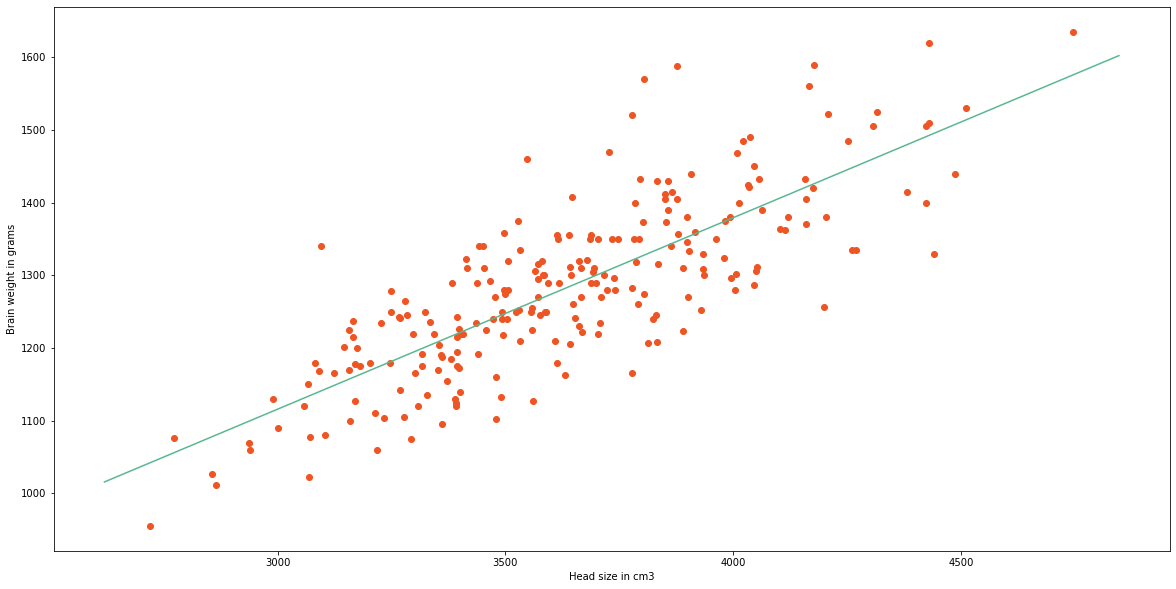

In [6]:
# plotting values and regression line
max_X=np.max(X)+100
min_X=np.min(X)-100

# calculating line values of X and Y
x=np.linspace(min_X,max_X,1000)
y=b0 + (b1*x)

# plotting line
plt.plot(x, y, color='#59b790',label='Regression Line')
# plotting scatter points
plt.scatter(X,Y,c='#ef5423',label='scatter plots')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend
plt.show

In [7]:
ss_t=0
ss_r=0
for i in range(n):
    predicted_Y=b0 + (b1*X[i])
    ss_r += (predicted_Y-mean_Y)**2
    ss_t += (Y[i]-mean_Y)**2
r2=(ss_r/ss_t)
print(r2)

0.6393116793479314


In [8]:
# using scikit learn library
# cannot use rank 1 matrix in scikit learn
X=X.reshape((n,1))
# creating model
reg=LinearRegression()
# Fitting training data
reg=reg.fit(X,Y)
# Y prediction
Y_pred=reg.predict(X)

# calculating r2 score
r2_score=reg.score(X,Y)
print(r2_score)

0.639311719957
